# Plot single module data taken by the DT5202

#### Created by Emily Pottebaum, 7/20/2023

### Import needed libraries

In [1]:
import ROOT

import sys
import math

import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle, TCanvas
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.colors as colors
from scipy.optimize import curve_fit
import scipy.signal
from lmfit.models import GaussianModel, ConstantModel
from datetime import datetime
from glob import glob

Welcome to JupyROOT 6.22/00


In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=14)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['axes.linewidth'] = 1.2 # set the value globally

# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=22)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_65889/833492359.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [3]:
from dt5202 import dt5202_crunch

from dt5202oldDAQ import dt5202_crunch as dt5202_crunch_oldDAQ
ped = 50 #pedestal correction

In [4]:
# %cd /home/coure/Software/caenqdc_custom/scripts/PECollectionStudies
from langaus import LanGausFit
# %cd -
from root_numpy import array2hist, hist2array, fill_hist

In [15]:
sipms = {'PCB5': [18, 19, 20, 21], 'PCB6': [22, 23, 24, 25], 'PCB7': [26, 27, 28, 29],
         'PCB8': [30, 31, 32, 33], 'PCB9': [34, 35, 36, 37], 'PCB10': [38, 39, 40, 41]}

# sipms = {'PCB5': [18, 19, 20, 21]}
# sipms = {'PCB5': [18, 19, 20, 21]}

num_channels = 1


In [159]:
for key in sipms:
    print(key[0:3])
    print(key[3:])
    print(sipms[key][0])

PCB
5
18
PCB
6
22


In [26]:
%%capture
dataFolder = "/data/SiPM_QA_data/"
data = []
# print(sipms)
for key in sipms:
    pcbData = []
    for sipm in sipms[key]:
        sourceFolder = dataFolder + "LED_" + key + "_SiPM" + str(sipm) + "/"
#         print(sourceFolder)
        onlyfiles = [f for f in os.listdir(sourceFolder) if '.dat' in f]
        data_list = []
        for file in onlyfiles:
            data_list.append(dt5202_crunch(str(sourceFolder)+str(file), num_ev=1000000000, num_ch=num_channels))
        data_temp = data_list[0]
        for i in range(1, len(data_list)):
            data_temp = np.append(data_temp, data_list[i])
        pcbData.append(data_temp)
    data.append(pcbData)
print(len(data))


In [ ]:
keyIn = 0
c = []
hpx = []
# funcs = []
for key in sipms: # for each PCB, plot and fit low gain for all 4 SiPMs
    cTitle = 'c' + str(keyIn)
    c.append(ROOT.TCanvas(cTitle,"",1000,800))
    c[keyIn].Divide(2,2)
    title = ROOT.TPaveText(.4,0.48,.6,0.52)
    title.AddText(key[0:3] + " " + key[3:])
    title.SetMargin(0.1)
#     hpx = []
    func = []
    for i in range(0,4): # for each SiPM on this PCB
        c[keyIn].cd(i+1)
#         title.Draw()
        ROOT.gStyle.SetStatW(0.4)
        hTitle = 'SiPM ' + str(sipms[key][i])
        hpx.append(ROOT.TH1D(hTitle, '', 300, 0, 300))
#         print(hTitle)
        fill_hist(hpx[i+keyIn],np.array(data[keyIn][i]['data']['low_gain']))
        hpx[i+keyIn].SetXTitle("ADC Counts")
        hpx[i+keyIn].Draw()
        ROOT.gStyle.SetOptFit(2)
        fit = LanGausFit()
        func.append(fit.fit(hpx[i+keyIn], fitrange=(50,130)))
        hpx[i+keyIn].Draw("same")
        func[i].Draw("same")
        c[keyIn].Draw("same")
#     hists.append(hpx)
    c[keyIn].cd()
    title.Draw()
    keyIn += 1
    c1.Draw()

In [27]:
%%capture
def drawHists(key, keyIn):
# for key in sipms:
#     keyIn = 0
    c1 = ROOT.TCanvas('c1',"",1000,1000)
    c1.Divide(2,2)
    title = ROOT.TPaveText(.4,0.48,.6,0.52)
    title.AddText(key[0:3] + " " + key[3:])
    title.SetMargin(0.1)
    hpx = []
    func = []
    for i in range(0,4): # for each SiPM on this PCB
        c1.cd(i+1)
#         title.Draw()
        ROOT.gStyle.SetStatW(0.5)
        hTitle = 'SiPM ' + str(sipms[key][i])
        hpx.append(ROOT.TH1D(hTitle, '', 300, 0, 300))
#         print(hTitle)
        fill_hist(hpx[i],np.array(data[keyIn][i]['data']['low_gain']))
        hpx[i].SetXTitle("ADC Counts")
        hpx[i].Draw()
        ROOT.gStyle.SetOptFit(2)
        fit = LanGausFit()
        func.append(fit.fit(hpx[i], fitrange=(50,130)))
        hpx[i].Draw("same")
        func[i].Draw("same")
        c1.Draw("same")
    c1.cd()
    title.Draw()
    c1.SaveAs("test/" + key + ".png")

In [28]:
%%capture
keyIn = 0
for key in sipms:
    drawHists(key, keyIn)
    keyIn += 1

In [9]:
%%capture
for key in sipms: # for each PCB, plot and fit low gain for all 4 SiPMs
    c1 = ROOT.TCanvas('c1',"",1000,800)
    c1.Divide(2,2)
    title = ROOT.TPaveText(.4,0.48,.6,0.52)
    title.AddText(key[0:3] + " " + key[3:])
    title.SetMargin(0.1)
    hpx = []
    func = []
    for i in range(0,4): # for each SiPM on this PCB
        c1.cd(i+1)
#         title.Draw()
        ROOT.gStyle.SetStatW(0.4)
        hTitle = 'SiPM ' + str(sipms[key][i])
        hpx.append(ROOT.TH1D(hTitle, '', 300, 0, 300))
#         print(hTitle)
        fill_hist(hpx[i],np.array(data[0][i]['data']['low_gain']))
        hpx[i].SetXTitle("ADC Counts")
        hpx[i].Draw()
        ROOT.gStyle.SetOptFit(2)
        fit = LanGausFit()
        func.append(fit.fit(hpx[i], fitrange=(50,130)))
        hpx[i].Draw("same")
        func[i].Draw("same")
        c1.Draw("same")
    c1.cd()
    title.Draw()
#     c1.Draw()

In [131]:
dataFolder = "/data/SiPM_QA_data/"
data = []
# print(sipms)
for key in sipms:
    for sipm in sipms[key]:
        sourceFolder = dataFolder + "LED_" + key + "_SiPM" + str(sipm) + "/"
#         print(sourceFolder)
        onlyfiles = [f for f in os.listdir(sourceFolder) if '.dat' in f]
        data_list = []
        for file in onlyfiles:
            data_list.append(dt5202_crunch(str(sourceFolder)+str(file), num_ev=1000000000, num_ch=num_channels))
        data_temp = data_list[0]
        for i in range(1, len(data_list)):
            data_temp = np.append(data_temp, data_list[i])
        data.append(data_temp)

[(259, [3, 0, 3], 1, 0, 288, 0.5, 1689877994325)]
((33, 0, 1.68987799e+09, 0, 1), (0, 3, 108, 937))
[(259, [3, 0, 3], 1, 0, 288, 0.5, 1689878085447)]
((33, 0, 1.68987809e+09, 0, 1), (0, 3, 70, 457))
[(259, [3, 0, 3], 1, 0, 288, 0.5, 1689878172553)]
((33, 0, 1.68987817e+09, 0, 1), (0, 3, 78, 486))
[(259, [3, 0, 3], 1, 0, 288, 0.5, 1689883642648)]
((33, 0, 1.68988364e+09, 0, 1), (0, 3, 104, 912))


/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

 FCN=2988.41 FROM MIGRAD    STATUS=CALL LIMIT   1483 CALLS        1484 TOTAL
                     EDM=0.0500158    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  34.4 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.23730e+01   1.94161e-02   3.48469e-04   4.82399e+00
   2  LandauMPV    7.36945e+01   3.07990e-02  -4.02083e-03  -3.18855e+00
   3  Normalisation   2.02738e+06   1.07984e+05   1.63025e+04  -8.15919e-05
   4  GaussianSigma   4.69164e-01   2.55806e-02  -3.81508e-03  -3.45582e+02
                               ERR DEF= 0.5
 FCN=1087.28 FROM MIGRAD    STATUS=CALL LIMIT   1481 CALLS        1482 TOTAL
                     EDM=0.0338517    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  25.9 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.08435e+01  

/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 38 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 39 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TROOT::Append>: Replacin

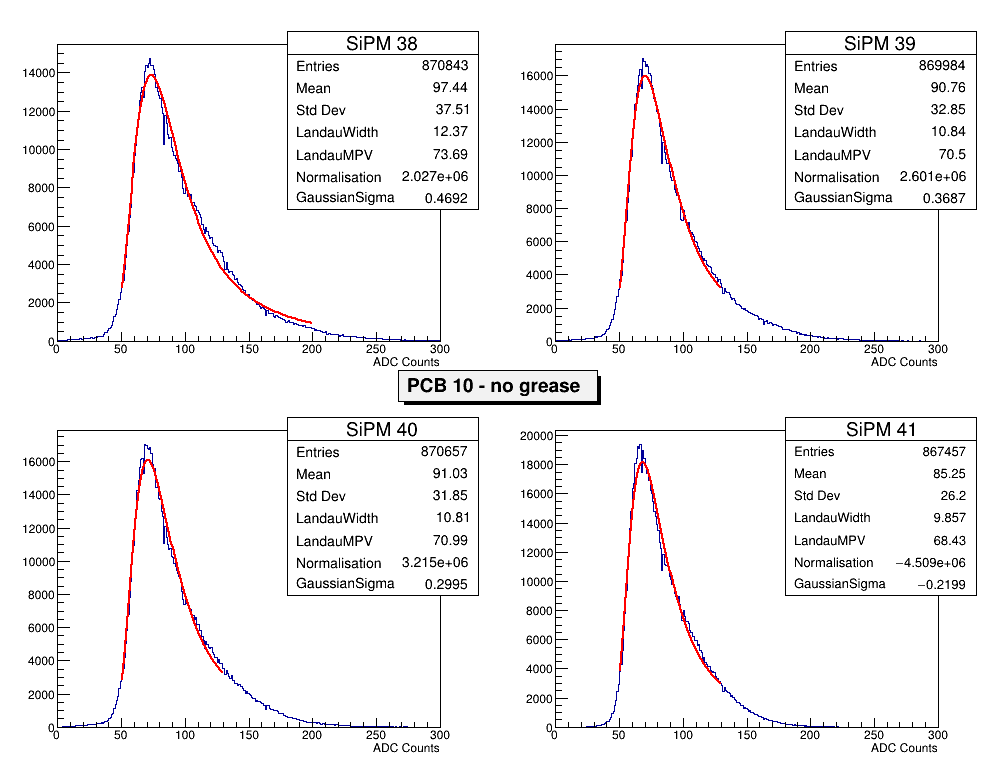

In [132]:
title.AddText("PCB 10 - no grease")
title.SetMargin(0.1)
# ROOT.gStyle.SetStatFontSize(.08)
ROOT.gStyle.SetStatW(0.4)
c1.Divide(2,2)
c1.cd(1)
hpx = ROOT.TH1D('SiPM 38','',300,0,300)
fill_hist(hpx,np.array(data[0]['data']['low_gain']))
hpx.SetXTitle("ADC Counts")
hpx.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit = LanGausFit()
func = fit.fit(hpx,fitrange=(50,200)) # this is the fit range, may need to tweak it 
# hpx.SetLineWidth(2)
hpx.Draw()
func.Draw("same")

c1.cd(2)
hpx2 = ROOT.TH1D('SiPM 39','',300,0,300)
fill_hist(hpx2,np.array(data[1]['data']['low_gain']))

hpx2.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit2 = LanGausFit()
func2 = fit2.fit(hpx2,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx2.SetXTitle("ADC Counts")
hpx2.Draw()
func2.Draw("same")

c1.cd(3)
hpx3 = ROOT.TH1D('SiPM 40','',300,0,300)
fill_hist(hpx3,np.array(data[2]['data']['low_gain']))
hpx3.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit3 = LanGausFit()
func3 = fit3.fit(hpx3,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx3.SetXTitle("ADC Counts")
hpx3.Draw()
func3.Draw("same")

c1.cd(4)
hpx4 = ROOT.TH1D('SiPM 41','',300,0,300)
fill_hist(hpx4,np.array(data[3]['data']['low_gain']))
hpx4.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit4 = LanGausFit()
func4 = fit.fit(hpx4,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx4.SetXTitle("ADC Counts")
hpx4.Draw()
func4.Draw("same")

c1.cd()
title.Draw()
c1.Draw()

In [122]:
dataFolder = "/data/SiPM_QA_data/"
pcbList = []
for key in sipms:
    folderHead = dataFolder + "LED_" + key + "_SiPM"
    pcbList.append(folderHead)
print(pcbList)


['/data/SiPM_QA_data/LED_PCB5_SiPM']


### Inputs

In [87]:
# Absolute path to folder containing data file(s):
# sourceFolder1 = "/data/SiPM_QA_data/LED_PCB5_SiPM18/"
# sourceFolder2 = "/data/SiPM_QA_data/LED_PCB5_SiPM19/"
# sourceFolder3 = "/data/SiPM_QA_data/LED_PCB5_SiPM20/"
# sourceFolder4 = "/data/SiPM_QA_data/LED_PCB5_SiPM21/"

# sourceFolder1 = "/data/SiPM_QA_data/LED_PCB6_SiPM22/"
# sourceFolder2 = "/data/SiPM_QA_data/LED_PCB6_SiPM23/"
# sourceFolder3 = "/data/SiPM_QA_data/LED_PCB6_SiPM24/"
# sourceFolder4 = "/data/SiPM_QA_data/LED_PCB6_SiPM25/"

# sourceFolder1 = "/data/SiPM_QA_data/LED_PCB7_SiPM26/"
# sourceFolder2 = "/data/SiPM_QA_data/LED_PCB7_SiPM27/"
# sourceFolder3 = "/data/SiPM_QA_data/LED_PCB7_SiPM28/"
# sourceFolder4 = "/data/SiPM_QA_data/LED_PCB7_SiPM29/"

# sourceFolder1 = "/data/SiPM_QA_data/LED_PCB8_SiPM30/"
# sourceFolder2 = "/data/SiPM_QA_data/LED_PCB8_SiPM31/"
# sourceFolder3 = "/data/SiPM_QA_data/LED_PCB8_SiPM32/"
# sourceFolder4 = "/data/SiPM_QA_data/LED_PCB8_SiPM33/"

# sourceFolder1 = "/data/SiPM_QA_data/LED_PCB9_SiPM34/"
# sourceFolder2 = "/data/SiPM_QA_data/LED_PCB9_SiPM35/"
# sourceFolder3 = "/data/SiPM_QA_data/LED_PCB9_SiPM36/"
# sourceFolder4 = "/data/SiPM_QA_data/LED_PCB9_SiPM37/"

sourceFolder1 = "/data/SiPM_QA_data/LED_PCB10_SiPM38/"
sourceFolder2 = "/data/SiPM_QA_data/LED_PCB10_SiPM39_55/"
sourceFolder3 = "/data/SiPM_QA_data/LED_PCB10_SiPM40/"
sourceFolder4 = "/data/SiPM_QA_data/LED_PCB10_SiPM41/"

# Number of DT5202 channels used during this run:
num_channels = 1

# Run time in minutes
run_time = 0.33 # 20 seconds

In [88]:
%%capture
onlyfiles = [f for f in os.listdir(sourceFolder1) if '.dat' in f]
print(onlyfiles)
data_list = []
for file in onlyfiles:
    data_list.append(dt5202_crunch(str(sourceFolder1)+str(file), num_ch=num_channels))
data1 = data_list[0]
for i in range(1, len(data_list)):
    data1 = np.append(data2, data_list[i])
    
onlyfiles = [f for f in os.listdir(sourceFolder2) if '.dat' in f]
print(onlyfiles)
data_list = []
for file in onlyfiles:
    data_list.append(dt5202_crunch(str(sourceFolder2)+str(file), num_ch=num_channels))
data2 = data_list[0]
for i in range(1, len(data_list)):
    data2 = np.append(data2, data_list[i])
    
onlyfiles = [f for f in os.listdir(sourceFolder3) if '.dat' in f]
print(onlyfiles)
data_list = []
for file in onlyfiles:
    data_list.append(dt5202_crunch(str(sourceFolder3)+str(file), num_ch=num_channels))
data3 = data_list[0]
for i in range(1, len(data_list)):
    data3 = np.append(data3, data_list[i])
    
onlyfiles = [f for f in os.listdir(sourceFolder4) if '.dat' in f]
print(onlyfiles)
data_list = []
for file in onlyfiles:
    data_list.append(dt5202_crunch(str(sourceFolder4)+str(file), num_ch=num_channels))
data4 = data_list[0]
for i in range(1, len(data_list)):
    data4 = np.append(data4, data_list[i])

/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(
/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

 FCN=7124.53 FROM MIGRAD    STATUS=CALL LIMIT   1485 CALLS        1486 TOTAL
                     EDM=0.399571    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  26.5 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   2.16985e+01   3.61990e-02  -1.38578e-02  -4.78577e+00
   2  LandauMPV    1.03595e+02   5.57297e-02  -2.21632e-02  -3.41201e+00
   3  Normalisation   1.59990e+06   5.04043e+04   2.23077e+04   3.77775e-05
   4  GaussianSigma   6.71996e-01   2.18737e-02  -9.32107e-03   1.06288e+02
                               ERR DEF= 0.5
 FCN=921.875 FROM MIGRAD    STATUS=CALL LIMIT   1489 CALLS        1490 TOTAL
                     EDM=0.0200644    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  19.2 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   1.03019e+01   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 38 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 39 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: SiPM 41 (Potential memory leak).
Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: png file plots/PCB10_38adj.png has been created


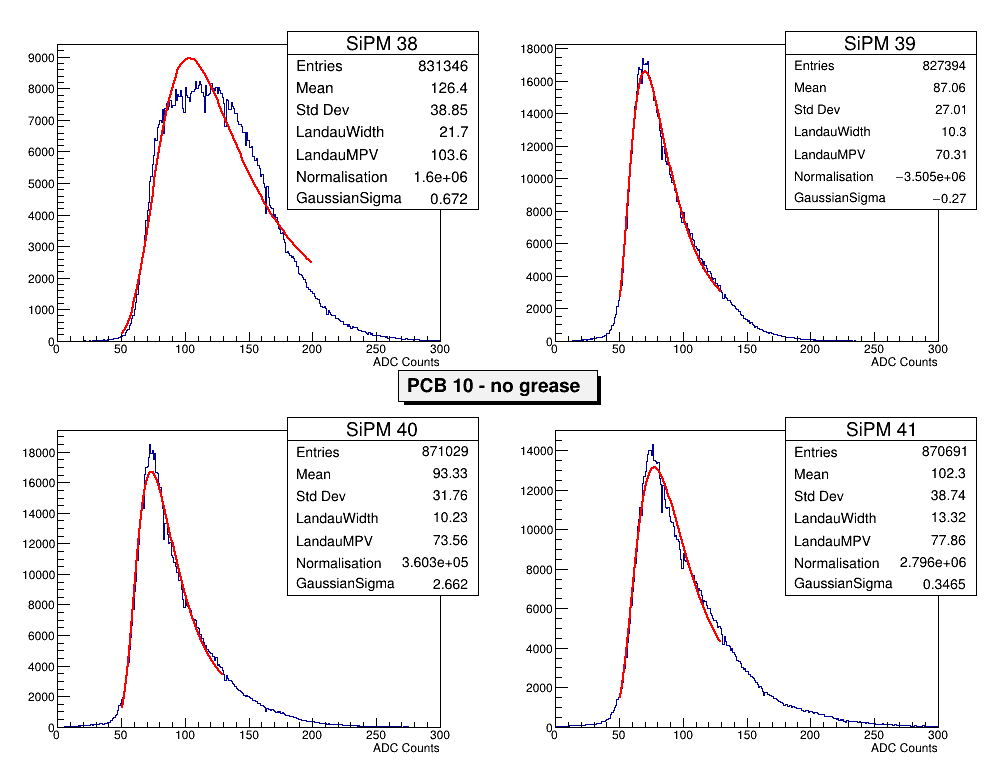

In [90]:
# Fit the muon peak and plot everything
# leg = ROOT.TLegend()
c1 = ROOT.TCanvas('c1',"",1000,800)
title = ROOT.TPaveText(.4,0.48,.6,0.52)
title.AddText("PCB 10 - no grease")
title.SetMargin(0.1)
# ROOT.gStyle.SetStatFontSize(.08)
ROOT.gStyle.SetStatW(0.4)
c1.Divide(2,2)
c1.cd(1)
hpx = ROOT.TH1D('SiPM 38','',300,0,300)
fill_hist(hpx,np.array(data1['data']['low_gain']))
hpx.SetXTitle("ADC Counts")
hpx.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit = LanGausFit()
func = fit.fit(hpx,fitrange=(50,200)) # this is the fit range, may need to tweak it 
# hpx.SetLineWidth(2)
hpx.Draw()
func.Draw("same")

c1.cd(2)
hpx2 = ROOT.TH1D('SiPM 39','',300,0,300)
fill_hist(hpx2,np.array(data2['data']['low_gain']))

hpx2.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit2 = LanGausFit()
func2 = fit2.fit(hpx2,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx2.SetXTitle("ADC Counts")
hpx2.Draw()
func2.Draw("same")

c1.cd(3)
hpx3 = ROOT.TH1D('SiPM 40','',300,0,300)
fill_hist(hpx3,np.array(data3['data']['low_gain']))
hpx3.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit3 = LanGausFit()
func3 = fit3.fit(hpx3,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx3.SetXTitle("ADC Counts")
hpx3.Draw()
func3.Draw("same")

c1.cd(4)
hpx4 = ROOT.TH1D('SiPM 41','',300,0,300)
fill_hist(hpx4,np.array(data4['data']['low_gain']))
hpx4.Draw()
# ROOT.gPad.SetLogy()
ROOT.gStyle.SetOptFit(2)
fit4 = LanGausFit()
func4 = fit.fit(hpx4,fitrange=(50,130)) # this is the fit range, may need to tweak it 
hpx4.SetXTitle("ADC Counts")
hpx4.Draw()
func4.Draw("same")

c1.cd()
title.Draw()
c1.Draw()
# c1.SaveAs("plots/PCB10_38adj.png")

### Plot high gain

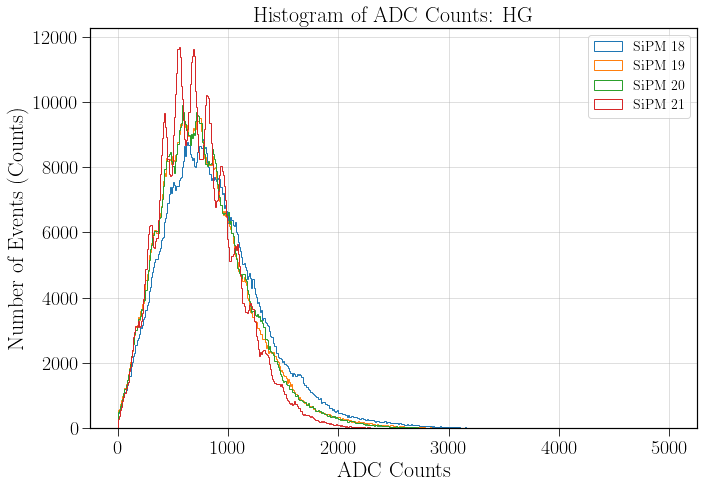

In [40]:
# High gain for each channel
plt.figure(figsize=(10,7))

plt.hist(data1['data']['high_gain'], bins=500, range=(0,5000), histtype='step', label="SiPM 18")
plt.hist(data2['data']['high_gain'], bins=500, range=(0,5000), histtype='step', label="SiPM 19")
plt.hist(data3['data']['high_gain'], bins=500, range=(0,5000), histtype='step', label="SiPM 20")
plt.hist(data4['data']['high_gain'], bins=500, range=(0,5000), histtype='step', label="SiPM 21")

# plt.yscale('log')
plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
plt.title('Histogram of ADC Counts: HG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()

# uncommenting the line below will save the plot as a png with the specified name in the current directory.
# plt.savefig('HG_allChannels.png')

In [12]:
def gaus(x, A, mu, sigma):
    return(A*np.exp(-(x-mu)**2 / (2*sigma**2)))

In [13]:
import pylandau

mean:  70.40978337493094  | sigma:  30.771261574046388
[1.45318378e+04 7.23855446e+01 1.34222238e+01]


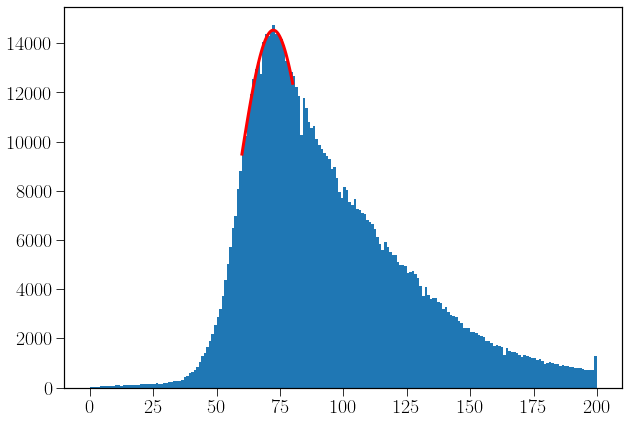

In [14]:
plt.figure(figsize=(10,7))

bin_heights, bin_borders, _ = plt.hist(np.array(data1['data']['low_gain']), bins=200, range=(0,200))
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

x_data = bin_centers[60:80]
y_data = bin_heights[60:80]
mean = sum(x_data*y_data)/sum(y_data)
sigma = sum(y_data*(x_data-mean)**2)/sum(y_data)
print("mean: ", mean, " | sigma: ", sigma)
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[max(y_data), mean, 5])
fitspace = np.linspace(60,80,60)
print(popt)
plt.plot(fitspace, gaus(fitspace, *popt), lw=3, color='red')

TypeError: 'cython_function_or_method' object does not support vectorcall

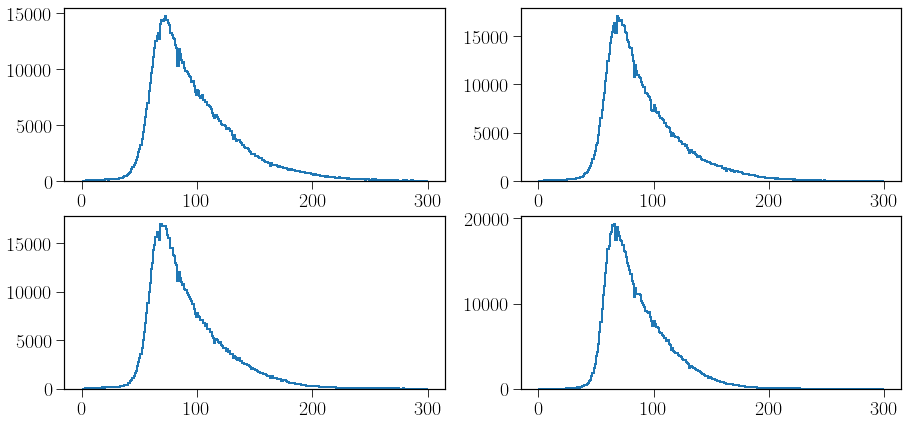

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

bin_heights1, bin_borders1, _ = ax1.hist(data1['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 18", lw=2)
bin_centers1 = bin_borders1[:-1] + np.diff(bin_borders1) / 2

bin_heights2, bin_borders2, _ = ax2.hist(data2['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 19", lw=2)
bin_centers2 = bin_borders2[:-1] + np.diff(bin_borders2) / 2

bin_heights3, bin_borders3, _ = ax3.hist(data3['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 20", lw=2)
bin_centers3 = bin_borders3[:-1] + np.diff(bin_borders3) / 2

bin_heights4, bin_borders4, _ = ax4.hist(data4['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 21", lw=2)
bin_centers4 = bin_borders4[:-1] + np.diff(bin_borders4) / 2

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 5, LG', fontsize="25")

In [42]:
def make_model(num):
    pref = "f{0}_".format(num)
    model = GaussianModel(prefix = pref)
    model.set_param_hint(pref+'amplitude', value=amplitude[num], min=1, max=200*amplitude[num])
    model.set_param_hint(pref+'center', value=center[num], min=center[num]-10, max=center[num]+10)
    model.set_param_hint(pref+'sigma', value=width[num], min=1, max=50)
    return model

NameError: name 'sigmas' is not defined

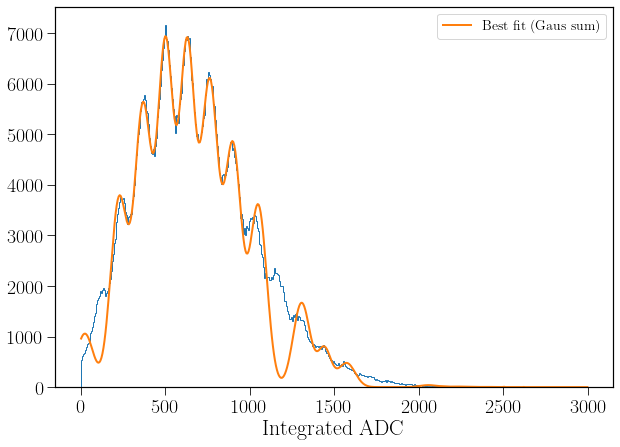

In [50]:
plt.figure(figsize=(10,7))

bin_heights, bin_borders, _ = plt.hist(np.array(data4['data']['high_gain']-ped),histtype='step', bins=500, range=(0,3000))
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

peaks_in_interval = scipy.signal.find_peaks_cwt(bin_heights, widths=2)
number_of_peaks = len(peaks_in_interval)
amplitude = bin_heights[peaks_in_interval]
width = np.zeros(number_of_peaks) + 10
center = bin_centers[peaks_in_interval]

mod = None
for i in range(len(peaks_in_interval)):
    this_mod = make_model(i)
    if mod is None:
        mod = this_mod
    else:
        mod = mod + this_mod

offset = ConstantModel()
offset.set_param_hint('c', value=np.average(bin_heights))

out=mod.fit(bin_heights, x=bin_centers)

plt.plot(bin_centers, out.best_fit, label='Best fit (Gaus sum)', lw=2)
plt.legend()
plt.xlabel("Integrated ADC")
sigmas = np.array(sigmas)
sigm_avg.append(sigmas.mean())
sigm_std.append(sigmas.std()/np.sqrt(len(sigmas)))
redchi.append(out.redchi)

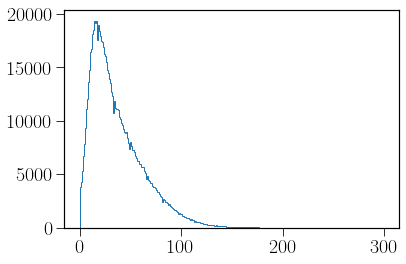

In [51]:
bin_heights, bin_borders, _ = plt.hist(np.array(data4['data']['low_gain']-ped),histtype='step', bins=300, range=(0,300))
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

Text(0.5, 0.98, 'PCB 6, HG')

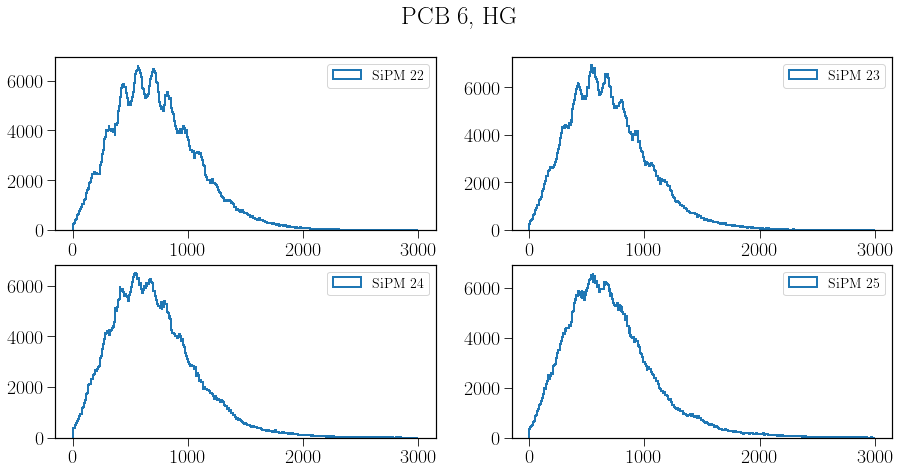

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 22", lw=2)
ax2.hist(data2['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 23", lw=2)
ax3.hist(data3['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 24", lw=2)
ax4.hist(data4['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 25", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 6, HG', fontsize="25")

Text(0.5, 0.98, 'PCB 7, HG')

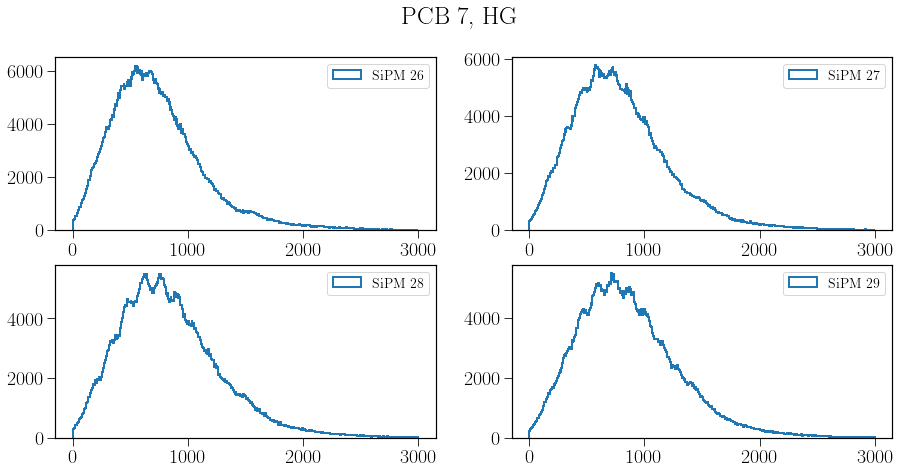

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 26", lw=2)
ax2.hist(data2['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 27", lw=2)
ax3.hist(data3['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 28", lw=2)
ax4.hist(data4['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 29", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 7, HG', fontsize="25")

Text(0.5, 0.98, 'PCB 8, HG')

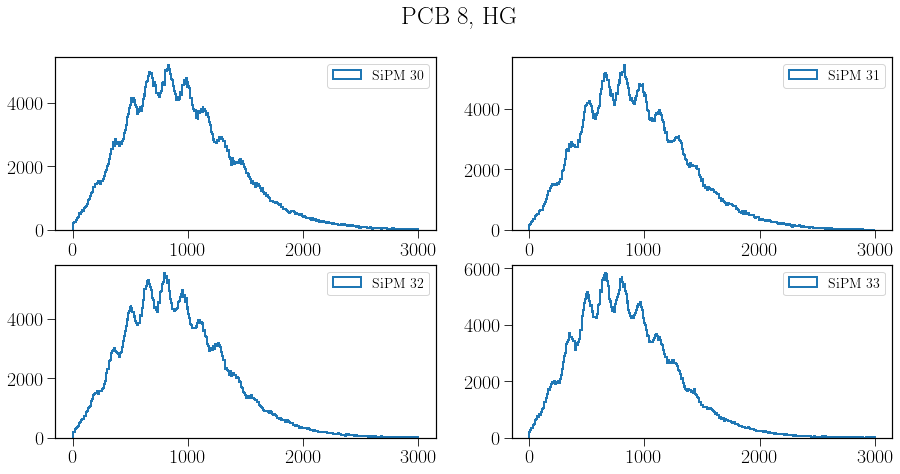

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 30", lw=2)
ax2.hist(data2['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 31", lw=2)
ax3.hist(data3['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 32", lw=2)
ax4.hist(data4['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 33", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 8, HG', fontsize="25")

Text(0.5, 0.98, 'PCB 9, HG')

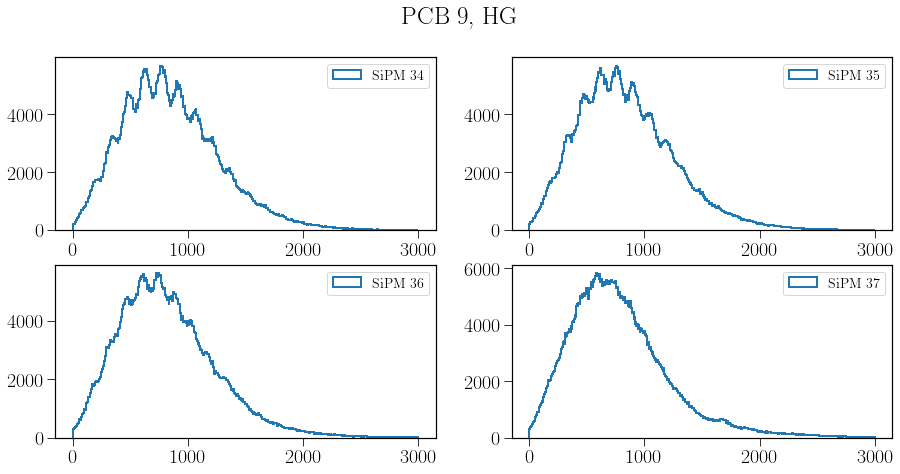

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 34", lw=2)
ax2.hist(data2['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 35", lw=2)
ax3.hist(data3['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 36", lw=2)
ax4.hist(data4['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 37", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 9, HG', fontsize="25")

Text(0.5, 0.98, 'PCB 10, HG')

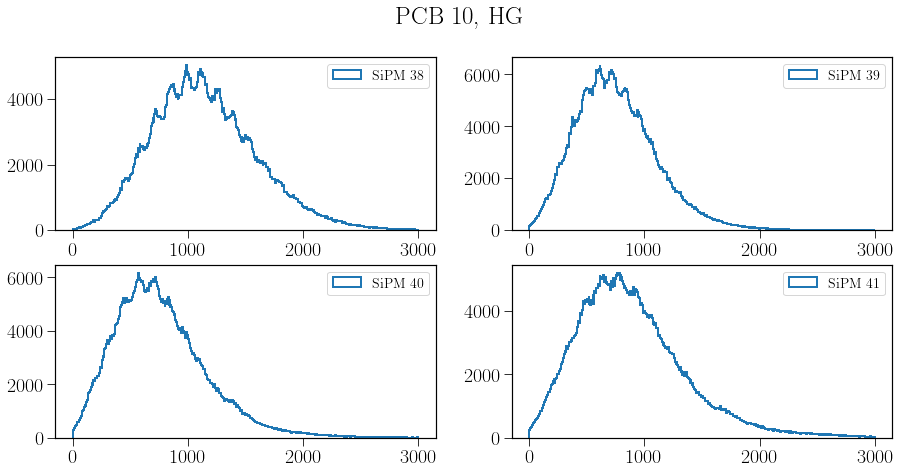

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 38", lw=2)
ax2.hist(data2['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 39", lw=2)
ax3.hist(data3['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 40", lw=2)
ax4.hist(data4['data']['high_gain'], bins=500, range=(0,3000), histtype='step', label="SiPM 41", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 10, HG', fontsize="25")

Text(0.5, 0.98, 'PCB 5, LG')

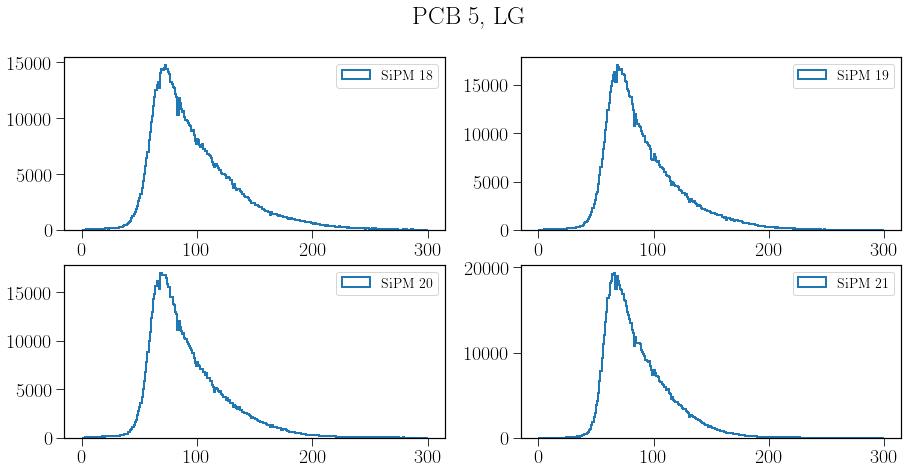

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,7))

ax1.hist(data1['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 18", lw=2)
ax2.hist(data2['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 19", lw=2)
ax3.hist(data3['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 20", lw=2)
ax4.hist(data4['data']['low_gain'], bins=300, range=(0,300), histtype='step', label="SiPM 21", lw=2)

# ax1.set_title('SiPM 18')
# ax2.set_title('SiPM 19')
# ax3.set_title('SiPM 20')
# ax4.set_title('SiPM 21')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.suptitle('PCB 5, LG', fontsize="25")

In [22]:
# Sum high gain data from each channel
nEvents_HG = np.shape(data['data']['high_gain'])[0]
energy_sum_HG = np.ones(nEvents_HG)
for ch in range(0, num_channels):
    energy_sum_HG += data['data']['high_gain'][:,ch]

TypeError: list indices must be integers or slices, not str

In [ ]:
# Plot high gain sum (this will probably look like garbage but I'm including it just in case)
plt.figure(figsize=(7,5))
plt.hist(energy_sum_HG, bins=400, range=(40,2000), histtype='step', label="Sum of energies from all channels")
plt.yscale('log')
plt.xlabel('ADC counts (sum)')
plt.ylabel('Number of Events (counts)')
plt.title('Histogram of Summed ADC Counts: HG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()

# plt.savefig('HG_sum.png')

### Plot low gain

In [ ]:
# Low gain for each channel
plt.figure(figsize=(7,5))

for ch in range(0, num_channels):
    if ch==3:
         plt.hist(data[ch]['data']['low_gain'][:,2]-ped, bins=200, range=(00,200), histtype='step', label="loc3 ch2", lw=1)
    else:
        plt.hist(data[ch]['data']['low_gain'][:,ch]-ped, bins=200, range=(0,200),
            histtype='step', label = "Ch%i"%ch, lw = 1);

# plt.yscale('log')
plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
plt.title('Histogram of ADC Counts: LG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()

# plt.savefig('LG_allChannels_cs137.png')

In [ ]:
plt.figure(figsize=(7,5))
# print(type(data[0]['data']['low_gain'][:,0]))
# sourceHist, sourceBins, _ = plt.hist(data[3]['data']['low_gain'][:,3], bins=500, range=(0,500), histtype='step', label="Ch0 source", lw=1)
# bkgHist, bkgBins, _ = plt.hist(data2['data']['low_gain'][:,0], bins=500, range=(0,500), 
#                                weights=2*np.ones_like(data2['data']['low_gain'][:,0]), histtype='step', label="Ch0 background", lw=1)
# resid = sourceHist - bkgHist
# plt.plot(resid, lw=2)
# plt.yscale('log')

plt.hist(data3['data']['low_gain'][:,3], bins=200, range=(0,200), histtype='step')
# plt.yscale('log')
plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
plt.title('Histogram of ADC Counts: LG, Cs-137')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

### Perform fit

In [ ]:
# Gaussian fit function
def gaus(x, A, mu, sigma):
    return(A*np.exp(-(x-mu)**2 / (2*sigma**2)))

In [ ]:
csPeak_means = []
csPeak_difs = []
for ch in range(0, num_channels):
    plt.figure(ch)
    if ch==3:
        bin_heights, bin_borders, _ = plt.hist(np.array(data[3]['data']['low_gain'][:,2]-ped), 
                                               bins=300, range=(0,300), lw=1, label="loc3 ch2")
    else:
        bin_heights, bin_borders, _ = plt.hist(np.array(data[ch]['data']['low_gain'][:,ch]-ped),
                                              bins=300, range=(0,300), lw=1)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x_data = bin_centers[40:140]
    y_data = bin_heights[40:140]
    mean = sum(x_data*y_data)/sum(y_data)
    sigma = sum(y_data*(x_data-mean)**2)/sum(y_data)
    popt, pcov = curve_fit(gaus, x_data, y_data, p0=[max(y_data), mean, sigma])
    fitspace = np.linspace(200,40,140)
    plt.plot(fitspace, gaus(fitspace, *popt), lw=3, color='red', label="Mean: %i, Sigma: %i"%(popt[1], popt[2]))
    plt.legend()
    plt.xlabel("ADC Counts")
    plt.title("Cs137 Peak Fit: Ch%i"%ch)
    csPeak_means.append(popt[1])
    if ch==0:
        csPeak_difs.append(0.0)
    else:
        csPeak_difs.append((popt[1]) - (csPeak_means[0]))


In [ ]:
print(csPeak_difs)
# Low gain for each channel
plt.figure(figsize=(7,5))

for ch in range(0, num_channels):
    if ch==3:
         plt.hist(data[ch]['data']['low_gain'][:,2]-(ped+csPeak_difs[ch]), bins=200, range=(0,200), histtype='step', label="loc3 ch2", lw=1)
    else:
        plt.hist(data[ch]['data']['low_gain'][:,ch]-(ped+csPeak_difs[ch]), bins=200, range=(0,200),
            histtype='step', label = "Ch%i"%ch, lw = 1);

# plt.yscale('log')
plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
plt.title('Histogram of ADC Counts, Compton maximums aligned')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()

In [ ]:
print(csPeak_means)
ADCToMev = [] # ADC/MeV
for i in range(0, len(csPeak_means)):
    ADCToMev.append(csPeak_means[i] / .662)
# print(ADCToMev)
# print(ADCToMev[0])
# plt.hist(data[0]['data']['low_gain'][:,0], bins=500, range=(0,500), histtype='step', lw=1)

In [ ]:
# _ = plt.hist((data[0]['data']['low_gain'][:,0])/ADCToMev[0], bins=500, range=(0,10), histtype='step', lw=1)
# plt.xlabel("MeV")

for ch in range(0, num_channels):
    _ = plt.hist((data[0]['data']['low_gain'][:,ch]-ped)/ADCToMev[ch], bins=300, range=(0,40),
                histtype='step', label="Ch%i"%ch, lw=1)
plt.xlabel('MeV')
plt.yscale('log')
plt.legend()
plt.title('Low gain source data in MeV')
plt.grid(alpha=0.5)
plt.yscale('log')

In [32]:
# sum LG data
nEvents_LG = np.shape(data[0]['data']['low_gain'])[0]
energy_sum_LG = np.ones(nEvents_LG)
energy_sum_cal = np.ones(nEvents_LG)
for ch in range(0, num_channels):
    energy_sum_LG += data[0]['data']['low_gain'][:,ch]-ped #/ADCToMev[ch]
    energy_sum_cal += (data[0]['data']['low_gain'][:,ch]-ped)/ADCToMev[ch]

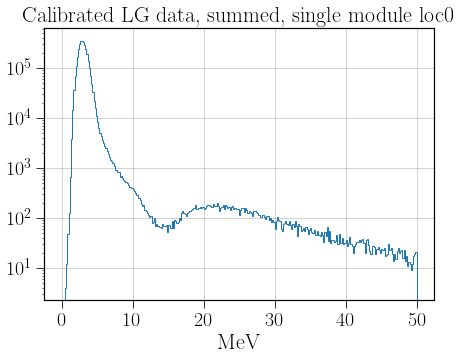

In [17]:
plt.figure(figsize=(7,5))
_ = plt.hist(energy_sum_cal, bins=300, range=(0,50), histtype='step')
plt.yscale('log')
plt.xlabel('MeV')
plt.title("Calibrated LG data, summed, single module loc0")
plt.grid(alpha=0.7)

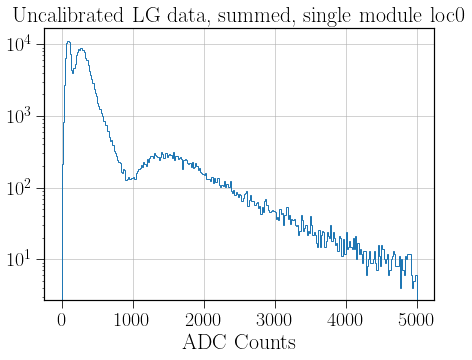

In [33]:
plt.figure(figsize=(7,5))
_ = plt.hist(energy_sum_LG, bins=300, range=(0,5000), histtype='step')
plt.yscale('log')
plt.xlabel('ADC Counts')
plt.title("Uncalibrated LG data, summed, single module loc0")
plt.grid(alpha=0.7)

123.50683742505849 279.97252738638997
[2.97223146e+04 1.21696193e+02 2.04532920e+01]


121.69619331268984

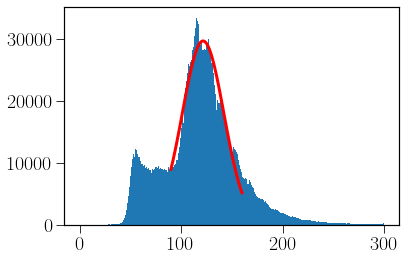

In [149]:
bin_heights, bin_borders, _ = plt.hist(np.array(data[2]['data']['low_gain'][:,2]), bins=300, range=(0,300), alpha=1)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# print(bin_centers[79:179])

x_data = bin_centers[90:160]
y_data = bin_heights[90:160]
# plt.plot(y_data, color='red')
mean = sum(x_data*y_data)/sum(y_data)
sigma = sum(y_data*(x_data-mean)**2)/sum(y_data)
# mean = sum(bin_centers*bin_heights)/sum(bin_heights)
# sigma = sum(bin_heights*(bin_centers-mean)**2)/sum(bin_heights)
print(mean, sigma)
# print(max(bin_heights))
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[max(y_data), mean, 5])
fitspace = np.linspace(90,160,90)
print(popt)
plt.plot(fitspace, gaus(fitspace, *popt), lw=3, color='red')
popt[1]

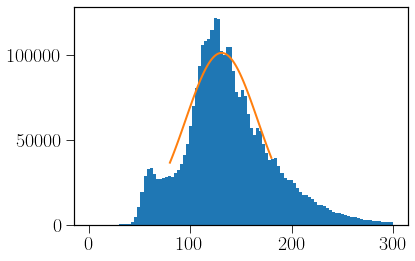

In [117]:
plt.hist(np.array(data['data']['low_gain'][:,0]), bins=100, range=(0,300))
plt.plot(fitspace, gaus(fitspace, *popt), lw=2)

1
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 465
    # data points      = 300
    # variables        = 3
    chi-square         = 6.3176e+10
    reduced chi-square = 2.1271e+08
    Akaike info crit   = 5755.62066
    Bayesian info crit = 5766.73201
[[Variables]]
    amplitude:  174075.000 +/- 77655.6029 (44.61%) (init = 34815)
    center:     124.210517 +/- 4.21043815 (3.39%) (init = 130.5)
    sigma:      7.08824000 +/- 4.21068379 (59.40%) (init = 1)
    fwhm:       16.6915293 +/- 9.91540244 (59.40%) == '2.3548200*sigma'
    height:     9797.33767 +/- 9074.58079 (92.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.577


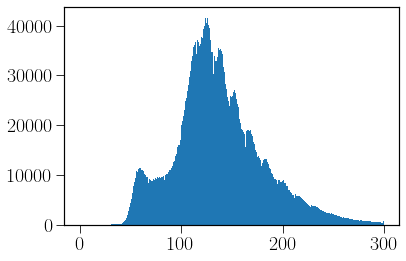

In [68]:
bin_heights, bin_borders, _ = plt.hist(np.array(data['data']['low_gain'][:,0]), bins=300, range=(0,300))
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

peaks_in_interval = scipy.signal.find_peaks_cwt(bin_heights, widths=50)
number_of_peaks = len(peaks_in_interval)
print(number_of_peaks)
amplitude = bin_heights[peaks_in_interval]
# print(amplitude)
width = np.zeros(number_of_peaks) + 1
center = bin_centers[peaks_in_interval]
# print(width)
# print(center)
def make_model(num):
    model = GaussianModel()
    model.set_param_hint('amplitude', value=amplitude[num], min=0.5*amplitude[num], max=5*amplitude[num])
    model.set_param_hint('center', value=center[num], min=center[num]-20, max=center[num]+20)
    model.set_param_hint('sigma', value=width[num])
    return model
mod = None
for i in range(number_of_peaks):
    this_mod = make_model(i)
    if mod is None:
        mod = this_mod
    else:
        mod = mod + this_mod
        
out=mod.fit(bin_heights, x=bin_centers)
print(out.fit_report())

Text(0.5, 0, 'ADC Counts')

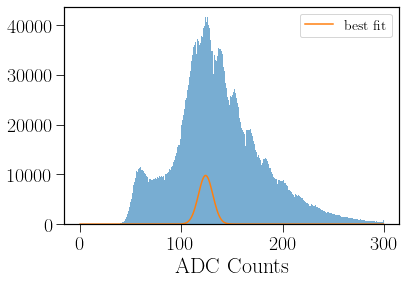

In [69]:
plt.hist(np.array(data['data']['low_gain'][:,0]), bins=300, range=(0,300), alpha=0.6)
plt.plot(bin_centers, out.best_fit, label='best fit')
plt.legend()
plt.xlabel("ADC Counts")

In [23]:
# sum low gain data
nEvents_LG = np.shape(data['data']['low_gain'])[0] # should be the same as nEvents_HG I think
energy_sum_LG = np.ones(nEvents_LG)
for ch in range(0, num_channels):
    energy_sum_LG += data['data']['low_gain'][:,ch]

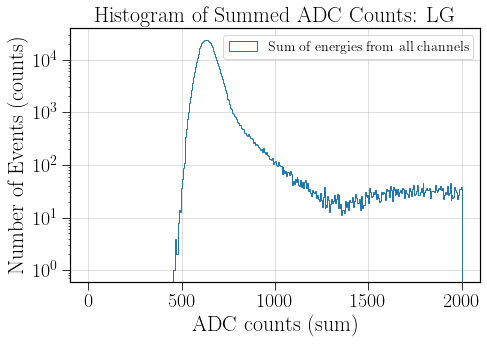

In [27]:
# Plot low gain sum
plt.figure(figsize=(7,5))
entries, bin_edges, _ = plt.hist(energy_sum_LG, bins=400, range=(0,2000), histtype='step', label="Sum of energies from all channels")
plt.yscale('log')
plt.xlabel('ADC counts (sum)')
plt.ylabel('Number of Events (counts)')
plt.title('Histogram of Summed ADC Counts: LG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()

# plt.savefig('LG_sum.png')

### Get muon flux

In [7]:
%cd /home/coure/Software/caenqdc_custom/scripts/PECollectionStudies
from langaus import LanGausFit
%cd -
from root_numpy import array2hist, hist2array, fill_hist

/home/coure/Software/caenqdc_custom/scripts/PECollectionStudies
/home/coure/SiPMs_QA/dt5202


 FCN=90863.8 FROM MIGRAD    STATUS=CONVERGED     127 CALLS         128 TOTAL
                     EDM=8.12528e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.10787e+04   1.34689e+02   6.62750e-01  -6.36597e-08
   2  MPV          7.34140e+01   2.66711e-02  -1.93211e-04   6.00477e-04
   3  Sigma        1.01207e+01   1.31031e-02  -2.92544e-06  -7.53095e-02


/home/coure/Software/DataTakingVenv/lib/python3.8/site-packages/root_numpy/_hist.py:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return _librootnumpy.fill_h1(


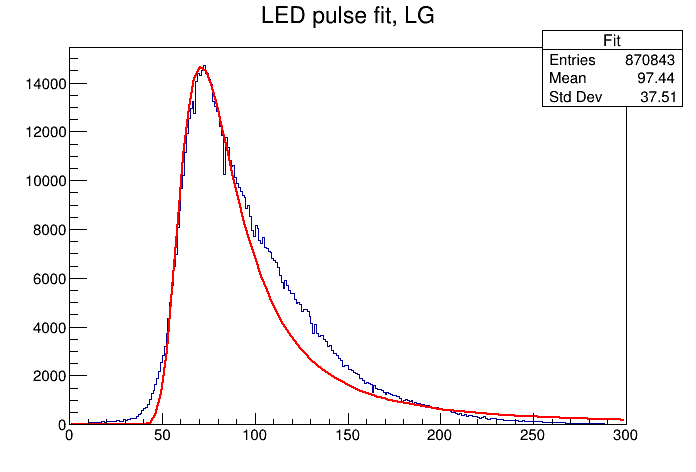

In [8]:
c1 = ROOT.TCanvas('c1','')
hpx = ROOT.TH1D('Fit', 'LED pulse fit, LG', 300, 0, 300)
fill_hist(hpx, np.array(data1['data']['low_gain']))
hpx.Draw()
fit = hpx.Fit("landau")
#fit.Draw("same")
c1.Draw()

In [10]:
MPV = func.GetParameter(1) # get the most probable value of the distribution
print(MPV)
ADCperMEV = MPV/5.0 # we expect the muon peak to be at 5 MeV
print("ADC per MeV: ", ADCperMEV)

73.98377573659774
ADC per MeV:  14.796755147319548


Text(0.5, 0, 'MeV')

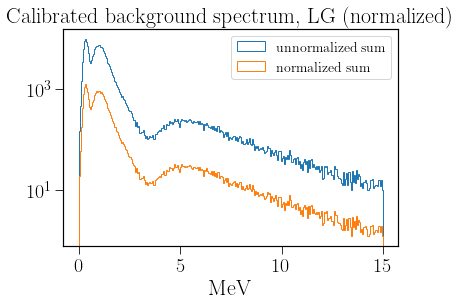

In [43]:
_ = plt.hist(energy_sum_LG/ADCperMEV, bins=300, range=(0,15), 
            histtype='step', label="unnormalized sum")
_ = plt.hist(energy_sum_LG/ADCperMEV, bins=300, range=(0,15), weights=np.ones_like(energy_sum_LG/ADCperMEV)/8., 
             histtype='step', label="normalized sum")
plt.yscale('log')
plt.title("Calibrated background spectrum, LG (normalized)")
plt.legend()
plt.xlabel("MeV")

Text(0.5, 1.0, 'Cs137 run calibrated from background muon peak')

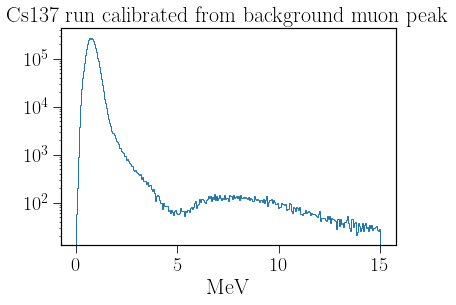

In [49]:
nEvents_cs = np.shape(data2['data']['low_gain'])[0]
energy_sum_cs = np.ones(nEvents_cs)
for ch in range(0,8):
    energy_sum_cs += data2['data']['low_gain'][:,ch]-ped

_ = plt.hist(energy_sum_cs/ADCperMEV, bins=300, range=(0,15), histtype='step', label="LG summed ADC")
plt.yscale('log')
plt.xlabel("MeV")
plt.title("Cs137 run calibrated from background muon peak")

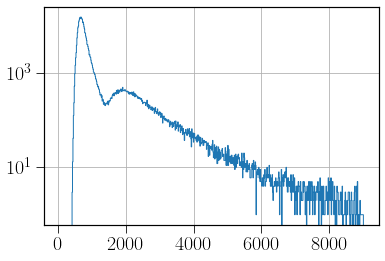

In [14]:
# eyeball where the muon peak begins (we want the x-axis value) 
plt.hist(energy_sum_LG, bins=700, range=(40,9000), histtype='step')
plt.yscale("log")
plt.grid()

In [15]:
bin_edges[200]

2600.0

In [16]:
sum(entries[200:])/(10*25*25)

2.45696

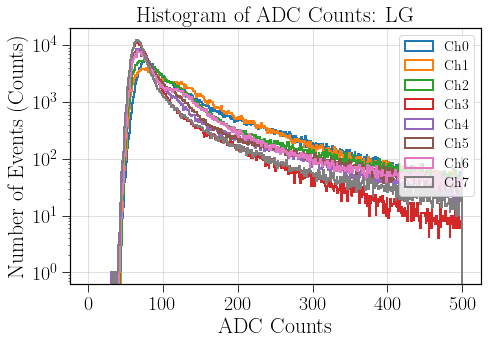

In [17]:
plt.figure(figsize=(7,5))
for ch in range(0,8):
    plt.hist(data['data']['low_gain'][:,ch], bins=500, range=(0,500),
             histtype='step', label = "Ch%i"%ch, lw = 2);
#     plt.hist(data2['data']['low_gain'], bins=500, range=(0,9000),
#              histtype='step', label = "Swirly");
#plt.xlim(3200,4500)
# plt.ylim(0,1000)
plt.yscale('log')

plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
plt.title('Histogram of ADC Counts: LG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()
# Can work on naming scheme
# plt.savefig(figure_folder + '/' + 'ADCHist_HighGainBigPanel.png')

In [18]:
plt.figure(figsize=(7,5))
for ch in range(0,1):
    entries, bin_edges, _ = plt.hist(data2['data']['low_gain'], bins=500, range=(0,7500),
             histtype='step', label = "Big panel ch0");
#     plt.hist(data['data']['high_gain'], bins=500, range=(0,4000),
#              histtype='step', label = "Swirly panel");
#     plt.hist(data2['data']['high_gain'], bins=500, range=(0,4000),
#              histtype='step', label = "Swirly");
#plt.xlim(3200,4500)
# plt.ylim(0,1000)
plt.yscale('log')

plt.xlabel('ADC Counts')
plt.ylabel('Counts')
plt.title('Co60 on top of panel - HG, 2min')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()
# Can work on naming scheme
# plt.savefig('swirlyVsBiggerMod_Co60HG.pdf')
# Can work on naming scheme
# plt.savefig(figure_folder + '/' + 'ADCHist_HighGainBigPanel.png')

NameError: name 'data2' is not defined

<Figure size 504x360 with 0 Axes>

In [242]:
bin_edges[0]

0.0

In [239]:
sum(entries[120:])/(10*25*25)

1.26064

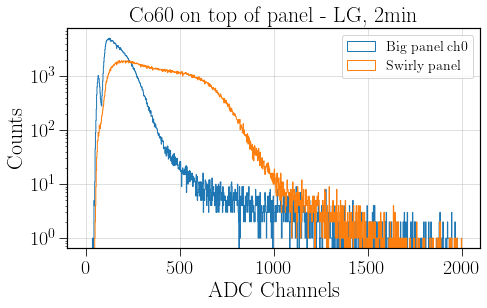

In [140]:
plt.figure(figsize=(7,4.5))
# for ch in range(0,1):
#     plt.hist(data['data']['low_gain'][:,ch], bins=500, range=(0,500),
#              histtype='step', label = "Ch%i"%ch);
# plt.hist(data['data']['low_gain'], bins=500, range=(0,4000),
#           histtype='step', label = "Ch0");
plt.hist(data2['data']['low_gain'], bins=1000, range=(0,2000),
          histtype='step', label = "Big panel ch0");
plt.hist(data['data']['low_gain'], bins=1000, range=(0,2000),
             histtype='step', label = "Swirly panel");
# plt.hist(data['data']['high_gain'][:,1], bins=300, range=(0,3000),
#           histtype='step', label = "Swirly mini-module");
# # plt.ylim(0,1000)
plt.yscale('log')

plt.xlabel('ADC Channels')
plt.ylabel('Counts')
plt.title('Co60 on top of panel - LG, 2min')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()
# Can work on naming scheme
plt.savefig('swirlyVsBiggerMod_Co60LG.pdf')

In [65]:
plt.figure(figsize=(7,5))
plt.hist(data['data']['low_gain'][:,0], bins=500, range=(0,8000),
         histtype='step', label = "Big panel");
plt.hist(data['data']['low_gain'][:,1], bins=500, range=(10,8000),
         histtype='step', label = "Swirly");
# plt.ylim(0,1000)
plt.yscale('log')

plt.xlabel('ADC Counts')
plt.ylabel('Number of Events (Counts)')
# plt.title('Histogram of ADC Counts: Prototype Panel')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()
# Can work on naming scheme
# plt.savefig(figure_folder + '/' + 'ADCHist_HighGainBigPanel.png')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 504x360 with 0 Axes>

## Sum of energies for all channels

In [264]:
nEvents = np.shape(data['data']['high_gain'])[0]

342416

In [268]:
energy_sum = np.ones(342416)
for ch in range(0,7):
    energy_sum += data['data']['low_gain'][:,ch]

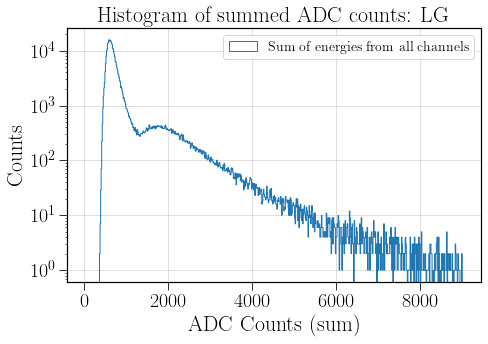

In [318]:
plt.figure(figsize=(7,5))
plt.hist(energy_sum, bins=700, histtype='step', range=(40, 9000), label="Sum of energies from all channels");    
plt.yscale('log')
plt.xlabel('ADC Counts (sum)')
plt.ylabel('Counts')
plt.title('Histogram of summed ADC counts: LG')
plt.legend()
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.savefig("LG_spectrum_sumChans_singleModule.pdf")

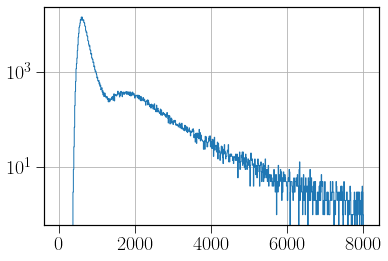

In [310]:
entries, bin_edges, _ = plt.hist(energy_sum, bins=700, histtype='step', range=(0, 8000));
plt.yscale("log")
plt.grid()

In [315]:
bin_edges[115]

1314.2857142857142

In [316]:
sum(entries[115:])/(10*100*50)

0.90252